# **1. Objective**

*    Overview: Integrate Probability and Statistics, Linear Regression, and Logistic Regression theories
into a cohesive case study that demonstrates their application in predicting an outcome based on
a given dataset.

*   Goal: Predict [Outcome] using the dataset provided, utilizing Linear and Logistic Regression
models to analyze and interpret the results.


# **2. Dataset Preparation**

The following are the description of variables use in the dataset:
*   Pregnancies - number of pregnancy
*   Glucose - glucose level of patient, higher glucose level shoes the chances of sugar
*   Blood Pressure - Blood pressure data of the patient
*   Skin Thickness - Triceps skin fold thickness
*   Insulin - Insulin level of patient
*   BMI - Body Mass Index (BMI), tool that measures the ratio of your weight to your height in order to estimate the amount of body fat you have.
*   Diabetes Pedigree Function - used to assess an individual’s risk of developing diabetes based on their family history
*   Age - Age of patient
*   Outcome - 0 shows that patient doesn't have diabetes 1 shows patient have diabetes

The dependent variable in this dataset wil be the outcome that will be based on the independent variable regnancies, glucose, blood pressure, skin thickness, insulin, BMI.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load the Dataset
df = pd.read_csv('/content/diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
#Missing Values
print("Missing Values\n")
print(df.isnull().sum())

Missing Values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
#Feature Selection
print(df.columns)

data_dummies = pd.get_dummies(df, drop_first=True)
data_dummies['result'] = (df['Outcome']>1).astype(int)

X = data_dummies.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], axis=1)
Y = data_dummies['result']

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


# **3. Exploratory Data Analysis (EDA)**

In [ ]:
#Descriptive Statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


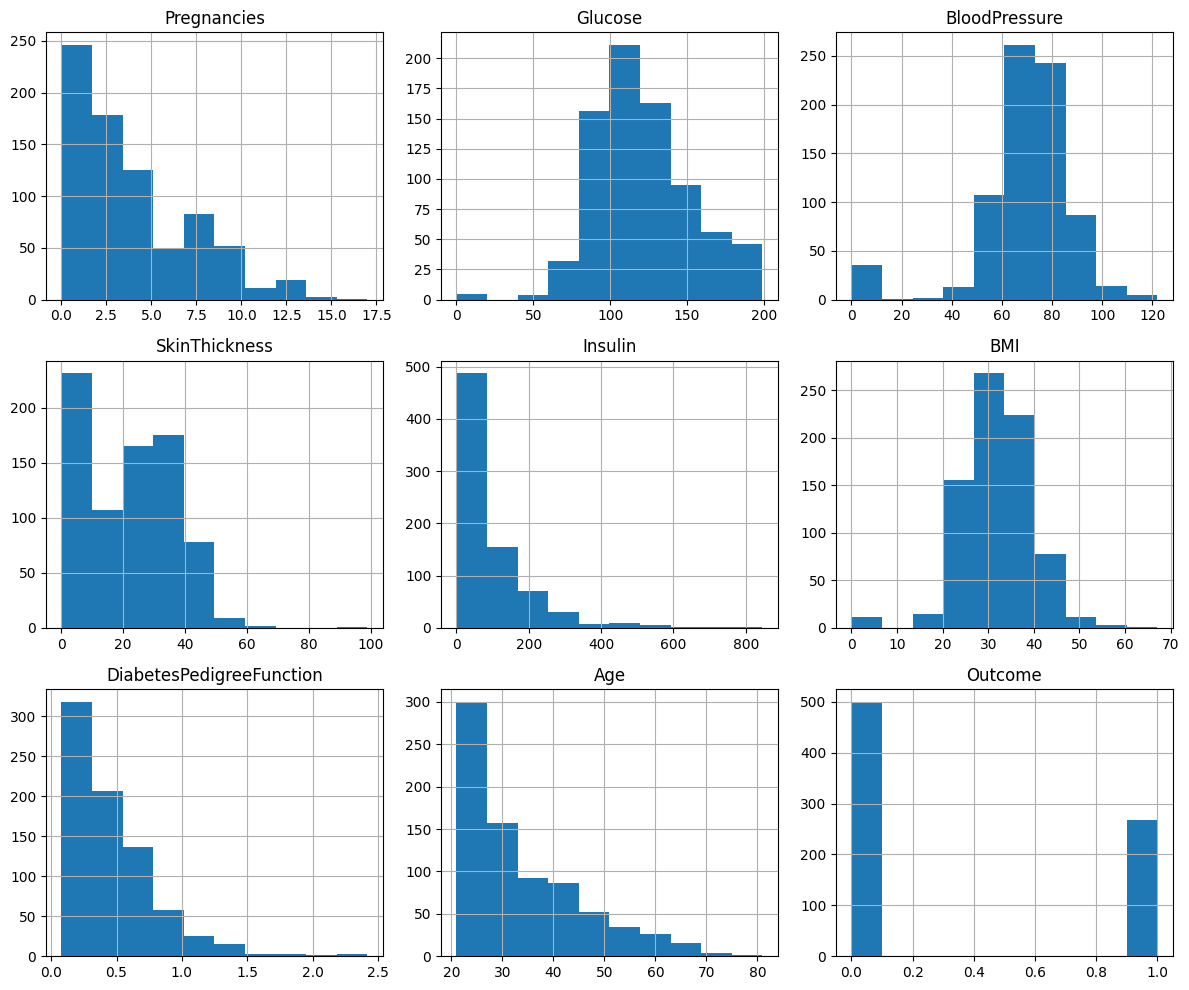

In [ ]:
#Visualization

df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()




# **4. Linear Regression Model**

 Theory Recap:  Denoting the independent variable (typically x) and the dependent variable (denoted as y), linear regression seeks to determine the relationship between the two variables.

In [ ]:
#Build the model
X = df[["Insulin"]]
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
coefficient = model.coef_
print("Slope: ", slope)
print("Intercept:", intercept)
print("Coefficients:", coefficient)

Slope:  0.0005402886537067087
Intercept: 0.30584358016787844
Coefficients: [0.00054029]


In [ ]:
y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.039714294516447035
Mean Squared Error (MSE): 0.22047375891204016
Root Mean Squared Error (RMSE): 0.4695463330833712


# **5. Logistic Regression Model**

Theory Recap: Logistic regression is a method for binary classification that predicts probabilities using a sigmoid function to transform linear combinations of features, enabling informed decisions based on feature relationships.

In [ ]:
# Feature selection
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X, y)


LogisticRegression(max_iter=1000)

In [ ]:
# Slope, Intercept and Coefficient
slope = model.coef_[0]
intercept = model.intercept_
coefficient = model.coef_
print("Slope: ", slope)
print("Intercept:", intercept)
print("Coefficients:", coefficient)


Slope:  [ 1.22360947e-01  3.51105693e-02 -1.32968752e-02  7.86285043e-04
 -1.17366065e-03  8.96772163e-02  8.66279720e-01  1.50063634e-02]
Intercept: [-8.365745]
Coefficients: [[ 1.22360947e-01  3.51105693e-02 -1.32968752e-02  7.86285043e-04
  -1.17366065e-03  8.96772163e-02  8.66279720e-01  1.50063634e-02]]


In [ ]:
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Evaluation Metrics:
Accuracy: 0.7857142857142857
Precision: 0.7115384615384616
Recall: 0.6727272727272727
F1 Score: 0.6915887850467289


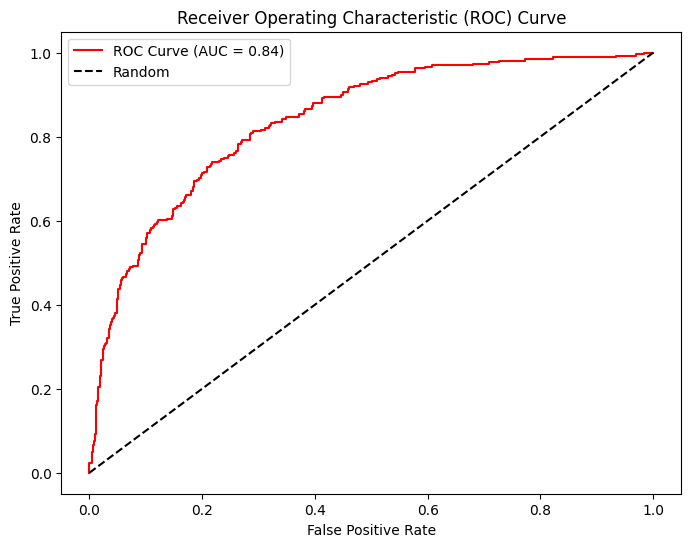

AUC Score: 0.8390820895522387


In [ ]:
y_predict_prob = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_prob)
auc_score = roc_auc_score(y, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("AUC Score:", auc_score)

# **6. Model Comparison and Selection**

In Liniear Regression Model the R-squared has approximately 0.0397, which suggests that only about 3.97% of the variance in the target variable is explained by the linear model, the mse is relatively low and rmse is approximately 0.46. However the Logistic Regression has an accuracy of 78.6%.


Comparing the prediction of the two model the Logistic Regression model fits the datasets of diabetic patients. Since the focus of the model is the "Outcome" which has value of 0 and 1, logistic regression provide probabilities and interpretability makes it valuable for such scenarios.

# **7. Conclusion and Insights**

The key findings are Linear Regression for continuous numeric predictions and Logistic Regression for binary classification tasks. When choosing the right model it is important to remember if the statistical data fit the model. The two machine learning method highlighted that each has its own strengths and weaknesses, and the choice of model should be based on the specific requirements of the task at hand. They are both simple yet powerful algorithms that can provide valuable insights when used correctly.

Some of fields that the we can apply Linear Regression are busines and economics, environmental sciences, financial analysis, since the data in these fields are continuous. While in Logistic Regression are medicine and healthcare, since the data in this field is more specific and not constant. Understanding the assumptions and limitations of linear regression and logistic regression is crucial for accurate predictions.Acknowledging these factors ensures that regression models are applied effectively, leading to meaningful insights and reliable predictions across various fields and scenarios.

# **8. References**

*   C.R. Harris, K.J. Millman, S.J. van der Walt, et al., “Array programming with NumPy,” Nature, vol. 585, pp. 357–362, 2020
*   Chen, L. (2021, December 22). Binary classification and logistic regression for beginners. Medium. https://towardsdatascience.com/binary-classification-and-logistic-regression-for-beginners-dd6213bf7162
*   Diabetes Dataset for Beginners. (2022, February 25). Kaggle. https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners
*   Family Health History and Diabetes | CDC. (n.d.). https://www.cdc.gov/genomics/famhistory/famhist_diabetes.htm
*   pandas - Python Data Analysis Library. (n.d.). https://pandas.pydata.org/
*   J. D. Hunter, “Matplotlib: A 2D Graphics Environment,” Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007
*   plotly-express. (2019, August 7). PyPI. https://pypi.org/project/plotly-express/
*   Professional, C. C. M. (n.d.). Body mass Index (BMI). Cleveland Clinic. https://my.clevelandclinic.org/health/articles/9464-body-mass-index-bmi
*   scikit-learn: machine learning in Python — scikit-learn 1.4.2 documentation. (n.d.). https://scikit-learn.org/stable/index.html
*   seaborn: statistical data visualization — seaborn 0.13.2 documentation. (n.d.). https://seaborn.pydata.org/
*  Zach. (2021, January 21). The four assumptions of linear regression. Statology. https://www.statology.org/linear-regression-assumptions/






